## Data Mining Project
### Problem 2: Performer model for the custom attention kernel

### Case1

Data Set Type: Uniform Random
Polynomial Expansion: MSE: 7.55e-31, Normalized MSE: 1.16e-31


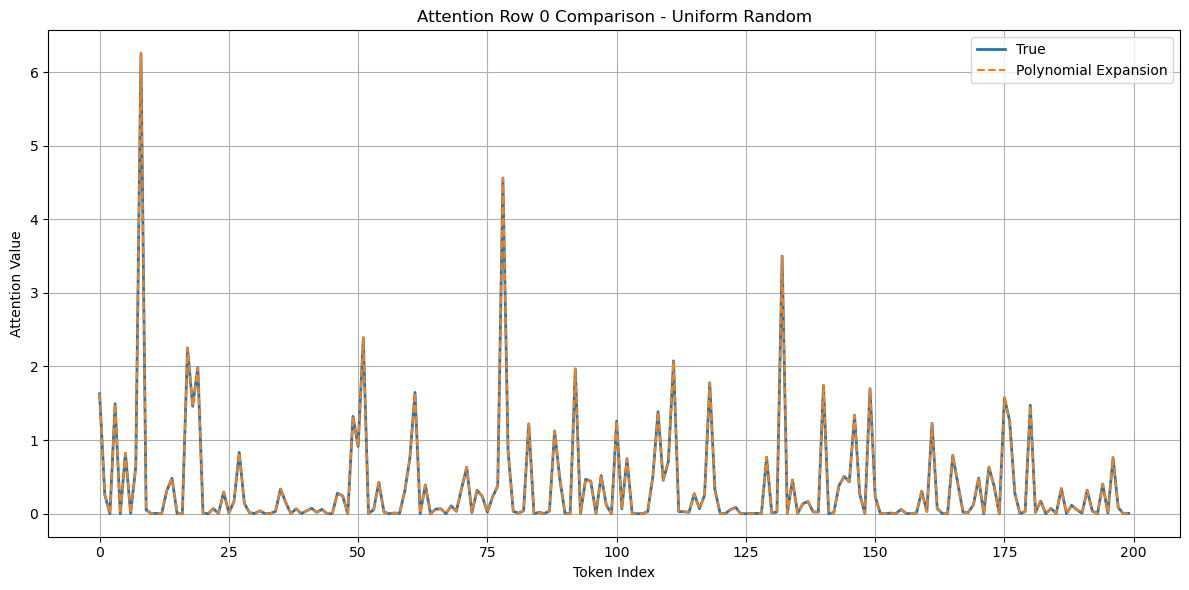

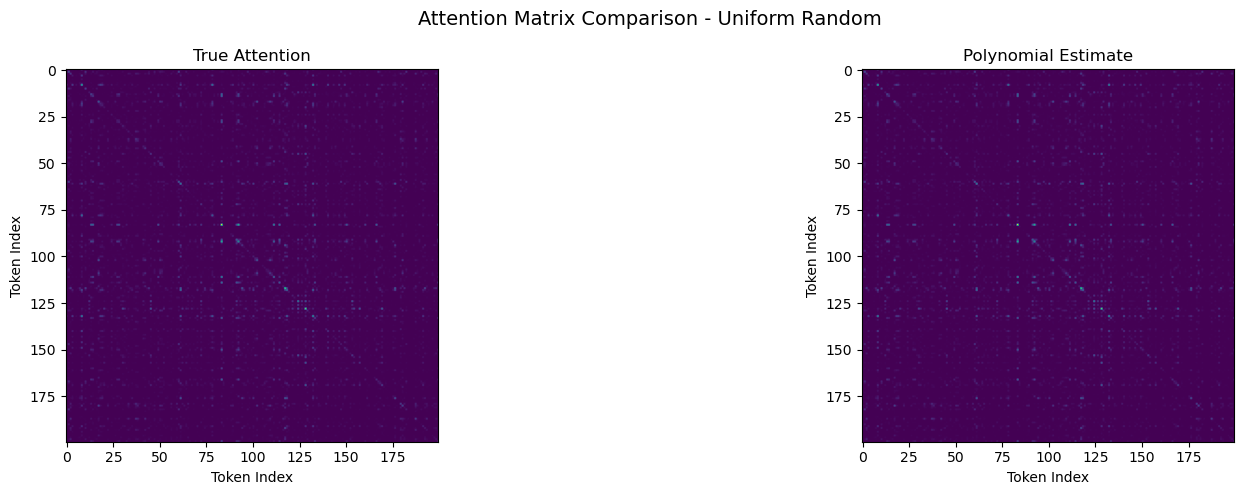

Data Set Type: Gaussian Random
Polynomial Expansion: MSE: 6.09e-26, Normalized MSE: 1.52e-31


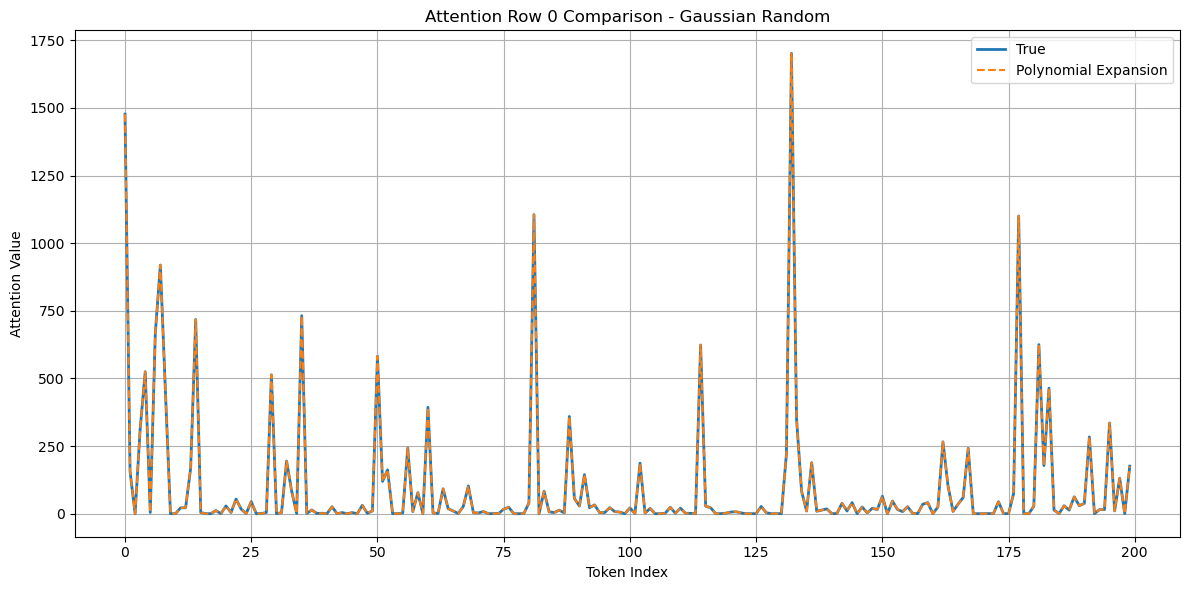

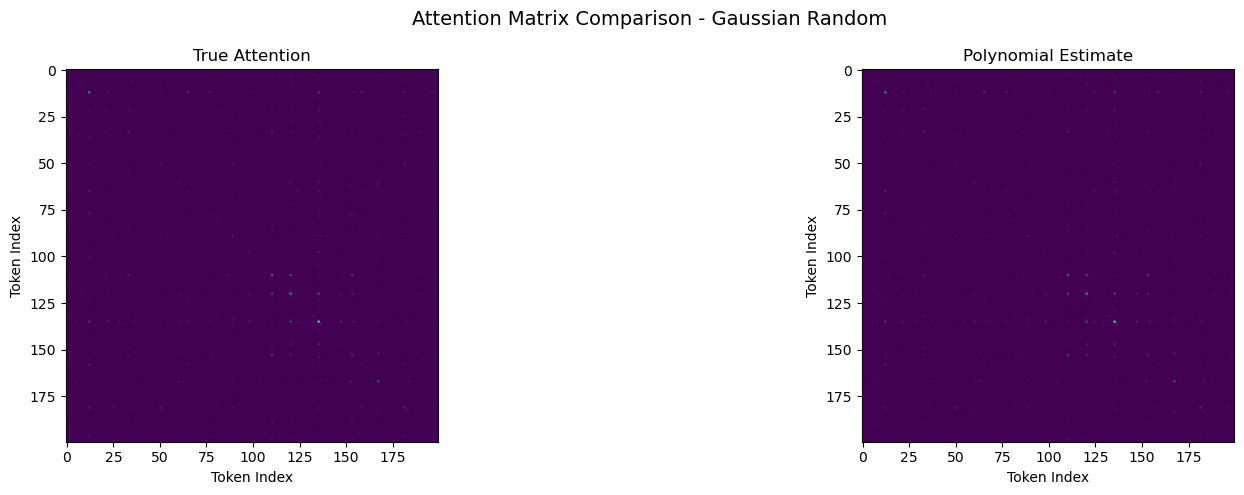

Data Set Type: Clustered Blobs
Polynomial Expansion: MSE: 4.39e-14, Normalized MSE: 9.06e-32


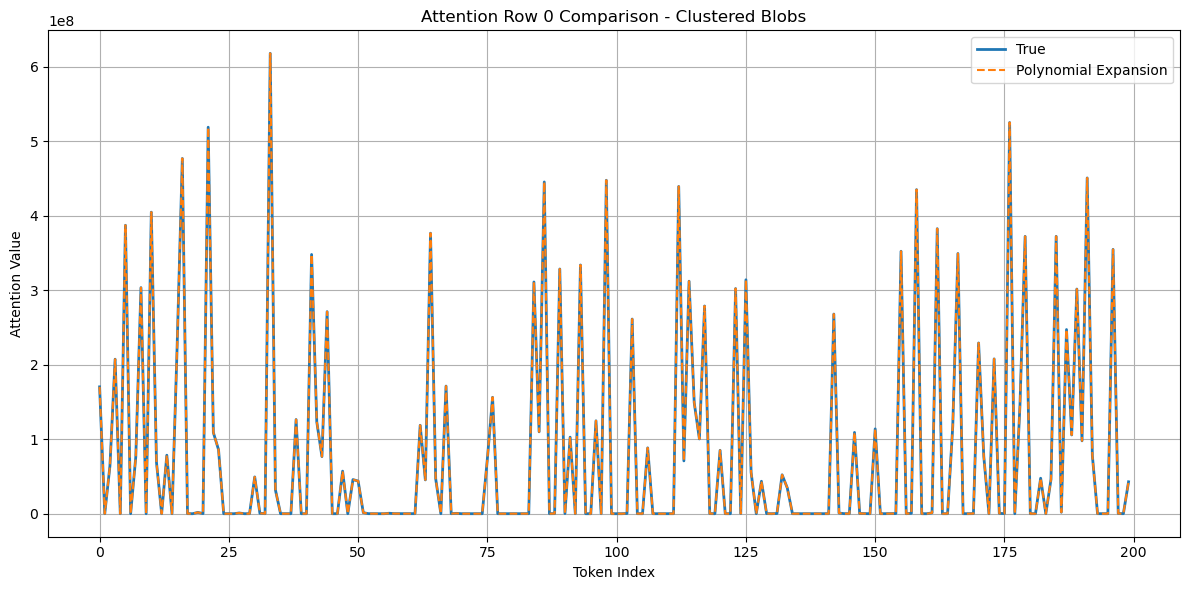

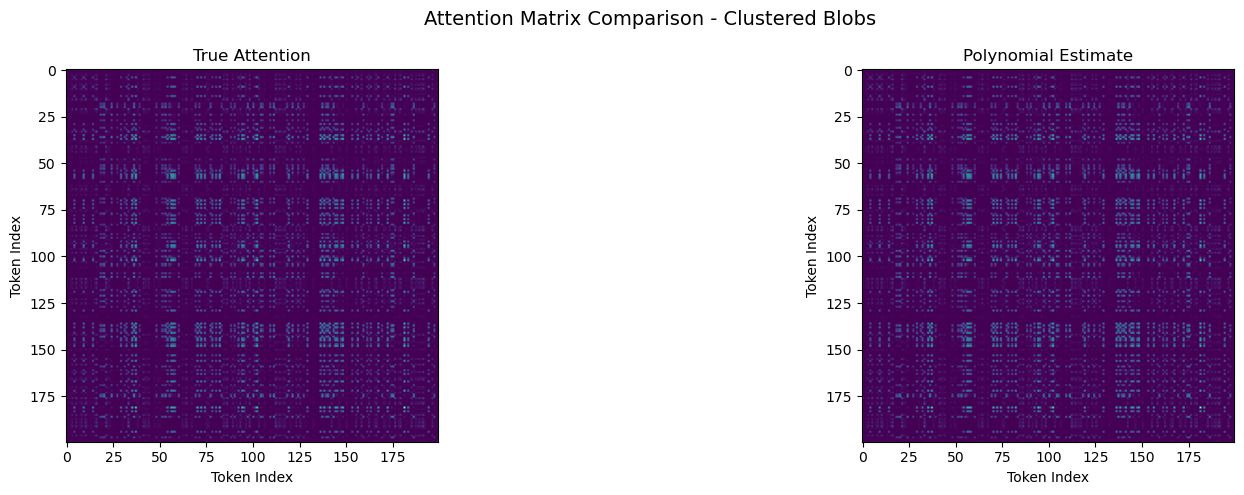

Data Set Type: Low-Rank Structure
Polynomial Expansion: MSE: 2.80e-23, Normalized MSE: 9.95e-32


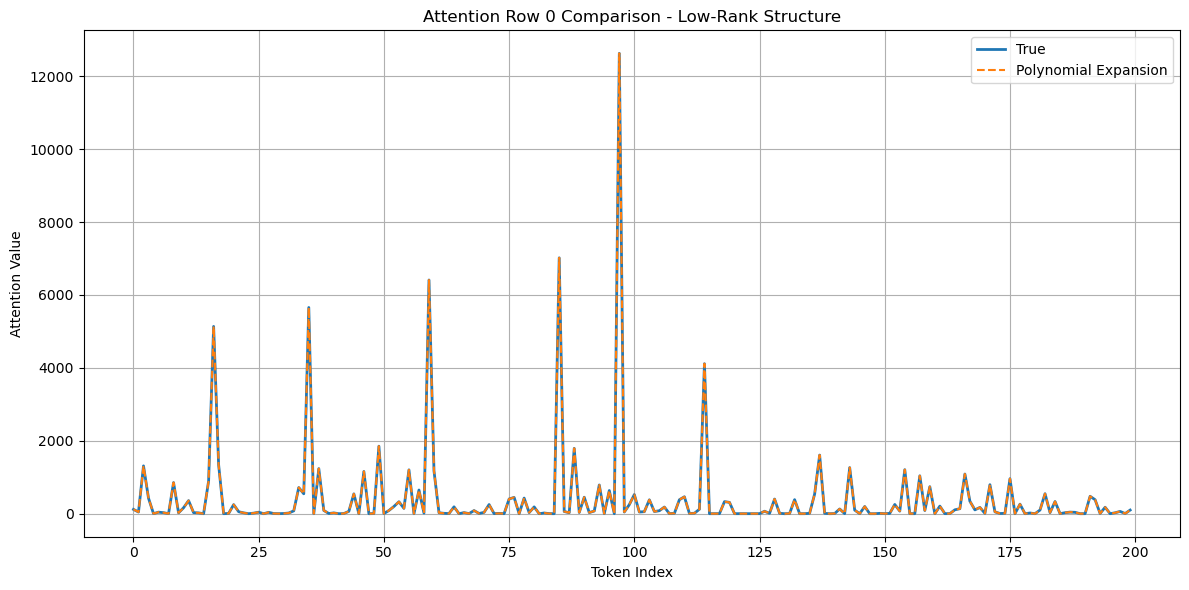

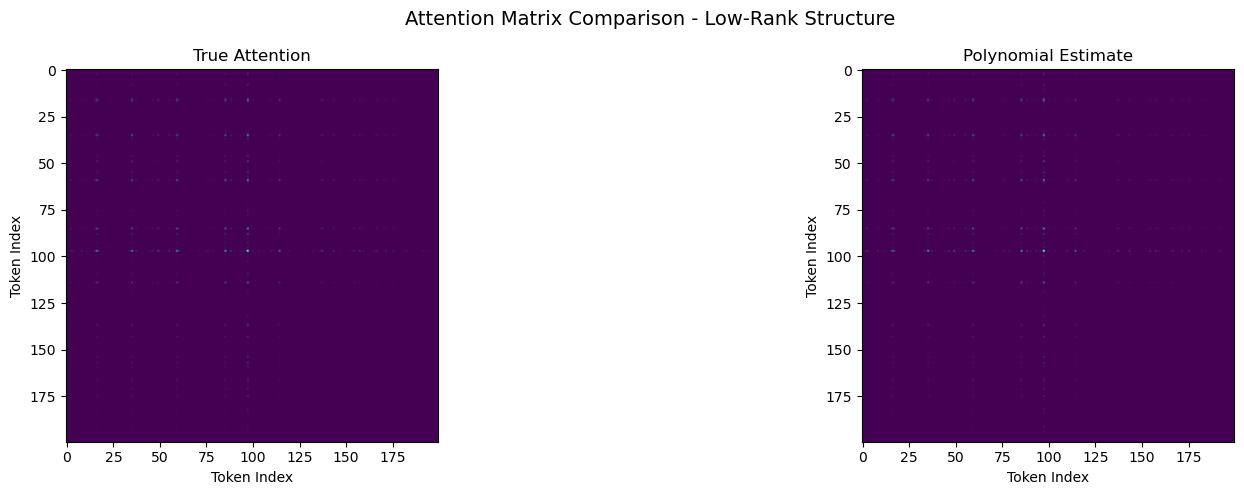

In [18]:
# d4QK ≪ L
# Polynomial Expansion Method
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from sklearn.datasets import make_blobs
import os

# Define the power set function
def powers_set(d, total_degree):
    def generator(d, total):
        if d == 1:
            return [[total]]
        return [[i] + rest for i in range(total + 1) for rest in generator(d - 1, total - i)]
    return generator(d, total_degree)

# Define the multinomial coefficients function
def multinomial_coeff(powers):
    total = sum(powers)
    numer = factorial(total)
    denom = np.prod([factorial(p) for p in powers])
    return numer // denom

# Define the multinomial power function
def multinomial_power(vectors, powers):
    return np.prod(vectors ** powers, axis=1)

# Define the Polynomial Expansion Estimation
def estimate_attention_poly(Q, K, degree=4):
    L, d = Q.shape
    powers_list = powers_set(d, degree)
    A_est = np.zeros((L, L))
    for powers in powers_list:
        coef = multinomial_coeff(powers)
        q = multinomial_power(Q, powers)
        k = multinomial_power(K, powers)
        A_est += coef * np.outer(q, k)
    return A_est

# The Regular Attention
def standard_attention(Q, K):
    return ( Q @ K.T) ** 4

# Evaluation
def evaluate_expansion(Q, K, name="Dataset"):
    A_true = standard_attention(Q, K)
    A_poly = estimate_attention_poly(Q, K, degree=4)

    mse_poly = np.mean((A_true - A_poly) ** 2)
    normalized_mse_poly = mse_poly / np.mean(A_true ** 2)

    # MSE resluts
    print(f"Data Set Type: {name}")
    print(f"Polynomial Expansion: MSE: {mse_poly:.2e}, Normalized MSE: {normalized_mse_poly:.2e}")
    
    # Visualization
    # Attention Comparison for a signle row
    plt.figure(figsize=(12,6))
    plt.plot(A_true[0], label="True", linewidth=2)
    plt.plot(A_poly[0], label="Polynomial Expansion", linestyle="--")
    plt.title(f"Attention Row 0 Comparison - {name}")
    plt.xlabel("Token Index")
    plt.ylabel("Attention Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Attention Heatmap
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))
    axs[0].imshow(A_true, cmap='viridis')
    axs[0].set_title("True Attention")

    axs[1].imshow(A_poly, cmap='viridis')
    axs[1].set_title("Polynomial Estimate")

    for ax in axs:
        ax.set_xlabel("Token Index")
        ax.set_ylabel("Token Index")

    fig.suptitle(f"Attention Matrix Comparison - {name}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Dataset Preparation
def prepare_data():
    np.random.seed(42)
    
    # Random data set
    if not os.path.exists("unifrom_random_200x4.npy"):
        pure_random = np.random.uniform(-1, 1, size=(200, 4))
        np.save("unifrom_random_200x4.npy", pure_random)
   
    # Gaussian data set
    if not os.path.exists("gaussian_token_200x4.npy"):
        gaussian_embeddings = np.random.normal(0, 1, size=(200, 4))
        np.save("gaussian_token_200x4.npy", gaussian_embeddings)

    # Clustered data set
    if not os.path.exists("clustered_tokens_200x4.npy"):
        cluster_embeddings, _ = make_blobs(n_samples=200, centers=5, n_features=4, random_state=42)
        np.save("clustered_token_200x4.npy", cluster_embeddings)

    # Lowrank data set
    if not os.path.exists("lowrank_token_200x4.npy"):
        U = np.random.normal(0, 1, size=(200, 2))
        V = np.random.normal(0, 1, size=(2, 4))
        lowrank_embeddings = U @ V
        np.save("lowrank_token_200x4.npy", lowrank_embeddings)

if __name__ == "__main__":
    prepare_data()

    datasets = {
        "Uniform Random": np.load("unifrom_random_200x4.npy"),
        "Gaussian Random": np.load("gaussian_token_200x4.npy"),
        "Clustered Blobs": np.load("clustered_token_200x4.npy"),
        "Low-Rank Structure": np.load("lowrank_token_200x4.npy")
    }

    for name, Q in datasets.items():
        K = Q.copy() 
        evaluate_expansion(Q, K, name=name)
